# COVID-19 Visualization for Counties with NSU Campuses

Project goal: Generate impactful visualizations of publicly available COVID-19 data for the counties where Northeastern State University has campus locations.

While there are many visualizations available for national and state data, there are no existing options for the small and relatively rural counties where NSU has its campuses. This project seeks to fill that gap and provide useful visualizations to drive decision making. 

This project is completed with data from The New York Times, based on reports from state and local health agencies. The New York Times tracking page for U.S. cases can be accessed at https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

In [48]:
# URL for raw file
# data is drawn from the publicly available NY Times database on github
csv_url = 'https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv'

In [49]:
# Estimated populations for counties taken from county Wikipedia pages
cher_pop = 48675
dav_pop = 694144
wag_pop = 81289
mus_pop = 68362

In [50]:
# Load data from the database into a local dataframe
df = pd.read_csv(csv_url)
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [51]:
# Dataframe with all oklahoma counties
okla_df = df[df['state'] == 'Oklahoma']

# Dataframe with cherokee county data
cherokee_df = pd.DataFrame(okla_df[okla_df['county'] == 'Cherokee'])
cherokee_df.reset_index(inplace = True, drop = True)

cherokee_df.head()

,date,county,state,fips,cases,deaths
0,2020-03-27,Cherokee,Oklahoma,40021.0,1,0
1,2020-03-28,Cherokee,Oklahoma,40021.0,1,0
2,2020-03-29,Cherokee,Oklahoma,40021.0,1,0
3,2020-03-30,Cherokee,Oklahoma,40021.0,1,0
4,2020-03-31,Cherokee,Oklahoma,40021.0,4,0


The following plot shows the daily total cases in Cherokee County, the home of the main NSU campus in Tahlequah. Some important dates are labeled.

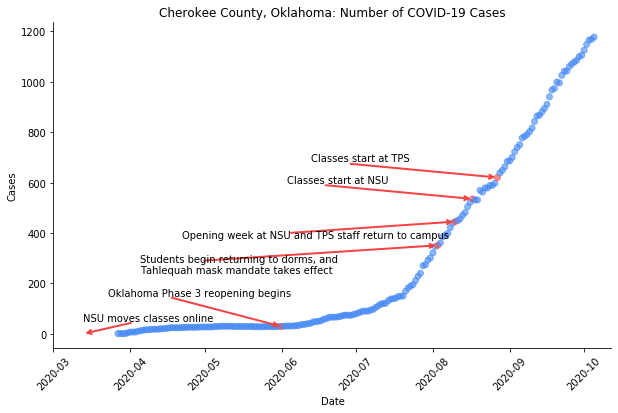

In [52]:
# create a plot with cherokee county data with important dates labeled

notes = {'nsucloses' : dt.datetime(2020, 3, 13),
         'reopening' : dt.datetime(2020, 6, 1),
         'movein' : dt.datetime(2020, 8, 3),
         'firstweek' : dt.datetime(2020, 8, 10),
         'nsustarts' : dt.datetime(2020, 8, 17),
         'tpsstarts' : dt.datetime(2020, 8, 27)}

# Points with a note will be plotted in red
colors = np.array(['#4287f5' for i in range(cherokee_df.shape[0])])
for i in range(len(colors)):
    if cherokee_df.iloc[i, 0] in set(notes.values()):
        colors[i] = '#f54242'

# Create plot
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(cherokee_df['date'], cherokee_df['cases'], color = colors, alpha = 0.6)
#ax.plot(cherokee_df['date'], cherokee_df['cases'], alpha = 0.6)
plt.title('Cherokee County, Oklahoma: Number of COVID-19 Cases')
plt.ylabel('Cases')
plt.xlabel('Date')
plt.xticks(rotation = 45)
ax.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate arrows
plt.annotate('',
             xy=(mdates.date2num(notes['nsucloses']), 0),
             xytext=(mdates.date2num(notes['nsucloses']) + 20, 45),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['reopening']), 29),
             xytext=(mdates.date2num(notes['reopening']) - 45, 145),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['movein']), 351),
             xytext=(mdates.date2num(notes['movein']) - 95, 290),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['firstweek']), 445),
             xytext=(mdates.date2num(notes['movein']) - 60, 400),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['nsustarts']), cherokee_df.loc[cherokee_df.date == notes['nsustarts'],'cases'].values[0]),
             xytext=(mdates.date2num(notes['nsustarts']) - 60, cherokee_df.loc[cherokee_df.date == notes['nsustarts'],'cases'].values[0]+55),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['tpsstarts']), cherokee_df.loc[cherokee_df.date == notes['tpsstarts'],'cases'].values[0]),
             xytext=(mdates.date2num(notes['tpsstarts']) - 60, cherokee_df.loc[cherokee_df.date == notes['tpsstarts'],'cases'].values[0]+55),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

# Text notes
plt.text(mdates.date2num(notes['nsucloses']), 50, 'NSU moves classes online')
plt.text(mdates.date2num(notes['reopening']) - 70, 150, 'Oklahoma Phase 3 reopening begins')
plt.text(mdates.date2num(notes['movein']) - 120, 240, 'Students begin returning to dorms, and \nTahlequah mask mandate takes effect')
plt.text(mdates.date2num(notes['firstweek']) - 110, 380, 'Opening week at NSU and TPS staff return to campus')
plt.text(mdates.date2num(notes['nsustarts']) - 75, 600, 'Classes start at NSU')
plt.text(mdates.date2num(notes['tpsstarts']) - 75, 685, 'Classes start at TPS')

fig.savefig('cherokee_cases' + str(dt.date.today()) + '.png', bbox_inches = 'tight')
plt.show()

Next we plot the daily increases in COVID-19 cases along with the 7-day average. The average serves to smooth out day-to-day variances in new cases.

In [53]:
# Calculate the daily increase in cases
daily_increase = [0 for i in range(cherokee_df.shape[0])]
daily_increase[0] = 1
for i in range(1,cherokee_df.shape[0]):
    daily_increase[i] = cherokee_df.loc[i, 'cases'] - cherokee_df.loc[i-1, 'cases']

# Add daily increase column to dataframe
cherokee_df['increase'] = daily_increase

seven_day_average = []
for i in range(len(daily_increase)):
    if i<6:
        seven_day_average.append(sum(daily_increase[0 : i+1])/7)
    else:
        seven_day_average.append(sum(daily_increase[i-6 : i+1])/7)

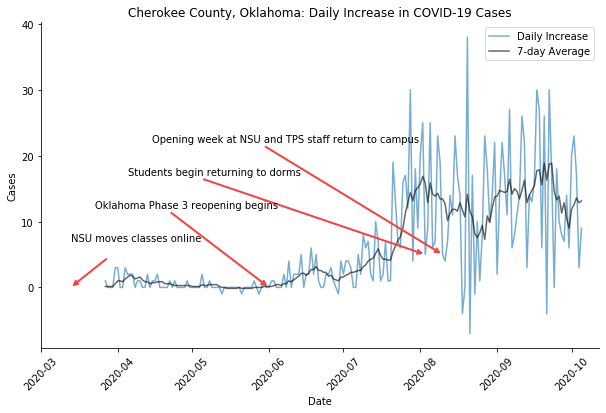

In [54]:
# Create plot of daily increases for cherokee county

fig, ax = plt.subplots(figsize = (10, 6))
#ax.scatter(cherokee_df['date'], cherokee_df['increase'], color = colors, alpha = 0.6)
ax.plot(cherokee_df['date'], cherokee_df['increase'], alpha = 0.6, label='Daily Increase')
ax.plot(cherokee_df['date'], seven_day_average, alpha = 0.6, color='black', label='7-day Average')
plt.title('Cherokee County, Oklahoma: Daily Increase in COVID-19 Cases')
plt.ylabel('Cases')
plt.xlabel('Date')
plt.xticks(rotation = 45)
ax.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

# Annotate arrows
plt.annotate('',
             xy=(mdates.date2num(notes['nsucloses']), 0),
             xytext=(mdates.date2num(notes['nsucloses']) + 15, 4.5),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['reopening']), 0),
             xytext=(mdates.date2num(notes['reopening']) - 40, 11.5),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['movein']), 5),
             xytext=(mdates.date2num(notes['movein']) - 90, 16.5),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['firstweek']), 5),
             xytext=(mdates.date2num(notes['movein']) - 65, 21.5),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

# Text notes
plt.text(mdates.date2num(notes['nsucloses']), 7, 'NSU moves classes online')
plt.text(mdates.date2num(notes['reopening']) - 70, 12, 'Oklahoma Phase 3 reopening begins')
plt.text(mdates.date2num(notes['movein']) - 120, 17, 'Students begin returning to dorms')
plt.text(mdates.date2num(notes['firstweek']) - 117, 22, 'Opening week at NSU and TPS staff return to campus')

fig.savefig('cherokee_increases' + str(dt.date.today()) + '.png', bbox_inches = 'tight')
plt.show()

In [55]:
# Create a per capita column in cherokee dataframe
cherokee_df['per capita'] = cherokee_df['cases']/cher_pop

## Plots for Cherokee, Muskogee, and Wagoner Counties

The following four plots contain all of the important data for the three counties with total cases displayed along with daily increases. The final plot compares the totale number of cases in each county on a per capita basis.

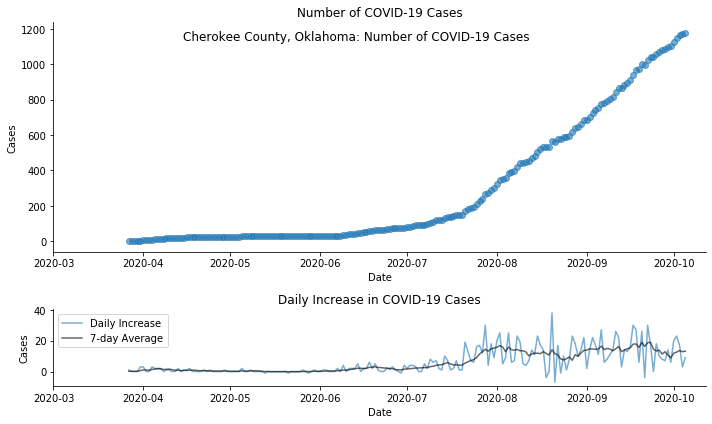

In [56]:
# Create double plot with total case numbers and daily rate

# Create plot
fig, (ax1, ax2) = plt.subplots(2, figsize = (10, 6), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Cherokee County, Oklahoma: Number of COVID-19 Cases', y=0.92)
ax1.scatter(cherokee_df['date'], cherokee_df['cases'], alpha = 0.6)
ax2.plot(cherokee_df['date'], cherokee_df['increase'], alpha = 0.6, label='Daily Increase')
ax2.plot(cherokee_df['date'], seven_day_average, alpha = 0.6, color='black', label='7-day Average')

# Annotate first plot
ax1.set_title('Number of COVID-19 Cases')
ax1.set_ylabel('Cases')
ax1.set_xlabel('Date')
ax1.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Annotate second plot
ax2.set_title('Daily Increase in COVID-19 Cases')
ax2.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax2.set_ylabel('Cases')
ax2.set_xlabel('Date')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend()

fig.tight_layout()

fig.savefig('cherokee' + str(dt.date.today()) + '.png', bbox_inches = 'tight')

In [57]:
# Dataframe with wagoner (BA campus) county data
wagoner_df = pd.DataFrame(okla_df[okla_df['county'] == 'Wagoner'])
wagoner_df.reset_index(inplace = True, drop = True)

# Create per capita column
wagoner_df['per capita'] = wagoner_df['cases']/wag_pop

# Dataframe with Muskogee county data
musk_df = pd.DataFrame(okla_df[okla_df['county'] == 'Muskogee'])
musk_df.reset_index(inplace = True, drop = True)

# Create per capita column
musk_df['per capita'] = musk_df['cases']/mus_pop

In [58]:
# Calculate the daily increase in cases for wagoner county
wag_daily_increase = [0 for i in range(wagoner_df.shape[0])]
wag_daily_increase[0] = 1
for i in range(1,wagoner_df.shape[0]):
    wag_daily_increase[i] = wagoner_df.loc[i, 'cases'] - wagoner_df.loc[i-1, 'cases']

# Add daily increase column to dataframe
wagoner_df['increase'] = wag_daily_increase

wag_seven_day_average = []
for i in range(len(wag_daily_increase)):
    if i<6:
        wag_seven_day_average.append(sum(wag_daily_increase[0 : i+1])/7)
    else:
        wag_seven_day_average.append(sum(wag_daily_increase[i-6 : i+1])/7)

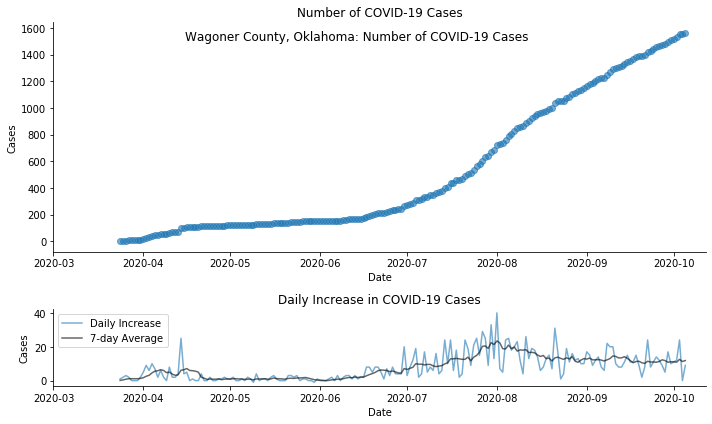

In [59]:
# Create double plot for wagoner county
fig, (ax1, ax2) = plt.subplots(2, figsize = (10, 6), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Wagoner County, Oklahoma: Number of COVID-19 Cases', y=0.92)
ax1.scatter(wagoner_df['date'], wagoner_df['cases'], alpha = 0.6)
ax2.plot(wagoner_df['date'], wagoner_df['increase'], alpha = 0.6, label='Daily Increase')
ax2.plot(wagoner_df['date'], wag_seven_day_average, alpha = 0.6, color='black', label='7-day Average')

# Annotate first plot
ax1.set_title('Number of COVID-19 Cases')
ax1.set_ylabel('Cases')
ax1.set_xlabel('Date')
ax1.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Annotate second plot
ax2.set_title('Daily Increase in COVID-19 Cases')
ax2.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax2.set_ylabel('Cases')
ax2.set_xlabel('Date')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend()

fig.tight_layout()

fig.savefig('wagoner' + str(dt.date.today()) + '.png', bbox_inches = 'tight')

In [60]:
# Calculate the daily increase in cases for muskogee county
mus_daily_increase = [0 for i in range(musk_df.shape[0])]
mus_daily_increase[0] = 1
for i in range(1,musk_df.shape[0]):
    mus_daily_increase[i] = musk_df.loc[i, 'cases'] - musk_df.loc[i-1, 'cases']

# Add daily increase column to dataframe
musk_df['increase'] = mus_daily_increase

mus_seven_day_average = []
for i in range(len(mus_daily_increase)):
    if i<6:
        mus_seven_day_average.append(sum(mus_daily_increase[0 : i+1])/7)
    else:
        mus_seven_day_average.append(sum(mus_daily_increase[i-6 : i+1])/7)

musk_df['7-day'] = mus_seven_day_average

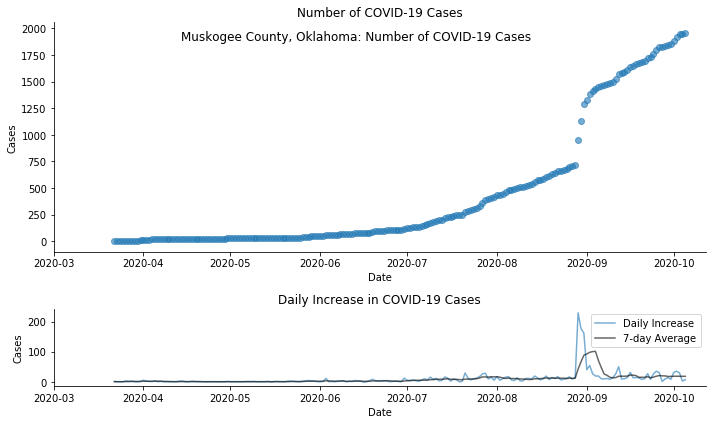

In [61]:
# Create plot for muskogee county
fig, (ax1, ax2) = plt.subplots(2, figsize = (10, 6), gridspec_kw={'height_ratios': [3, 1]})
fig.suptitle('Muskogee County, Oklahoma: Number of COVID-19 Cases', y=0.92)
ax1.scatter(musk_df['date'], musk_df['cases'], alpha = 0.6)
ax2.plot(musk_df['date'], musk_df['increase'], alpha = 0.6, label='Daily Increase')
ax2.plot(musk_df['date'], mus_seven_day_average, alpha = 0.6, color='black', label='7-day Average')

# Annotate first plot
ax1.set_title('Number of COVID-19 Cases')
ax1.set_ylabel('Cases')
ax1.set_xlabel('Date')
ax1.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Annotate second plot
ax2.set_title('Daily Increase in COVID-19 Cases')
ax2.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax2.set_ylabel('Cases')
ax2.set_xlabel('Date')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend()

fig.tight_layout()

fig.savefig('muskogee' + str(dt.date.today()) + '.png', bbox_inches = 'tight')

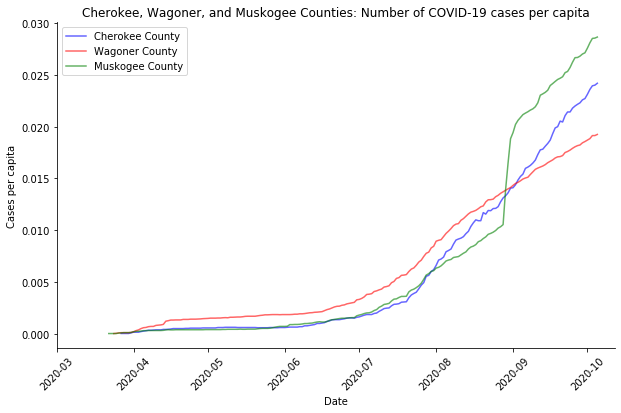

In [62]:
# Create plot of per capita data for three counties with NSU campuses
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(cherokee_df['date'], cherokee_df['per capita'], color = 'blue', alpha = 0.6, label = 'Cherokee County')
ax.plot(wagoner_df['date'], wagoner_df['per capita'], color = 'red', alpha = 0.6, label = 'Wagoner County')
ax.plot(musk_df['date'], musk_df['per capita'], color = 'green', alpha = 0.6, label = 'Muskogee County')
plt.title('Cherokee, Wagoner, and Muskogee Counties: Number of COVID-19 cases per capita')
plt.ylabel('Cases per capita')
plt.xlabel('Date')
plt.xticks(rotation = 45)
ax.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()

fig.savefig('county_comparison' + str(dt.date.today()) + '.png', bbox_inches = 'tight')
plt.show()